In [1]:
from bs4 import BeautifulSoup
import requests
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Empty DataFrame for data

start_date = datetime(2016, 1, 1)
end_date = datetime(2021, 12, 31)

date_list = []

while start_date <= end_date:
    date_list.append(start_date)
    start_date += timedelta(days=1)
    
data = pd.DataFrame(index=date_list)

In [4]:
#downloaders

def download_data(ticker):
    df = yf.download(ticker
                  , start='2016-01-01'
                  , end='2021-12-31')['Close'][ticker]
    df = pd.DataFrame(df)
    return df

def get_tickers(url, n=100):
    html = requests.get(url).text
    page = BeautifulSoup(html, 'html5lib')
    p = page.find_all("div", {"class": "company-code"})
    tickers = []
    for i in p:
        tickers.append(i.text)
    return tickers[:n]

In [5]:
#USA data
url = 'https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/'

for i in get_tickers(url, n=98):
    if i == 'PLTR' or i == 'UBER':
        pass
    else:
        data = pd.concat([data, download_data(i)], axis=1, join="outer")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
#Japan data
url = 'https://companiesmarketcap.com/japan/largest-companies-in-japan-by-market-cap/'
tickers = get_tickers(url, n=12)
tickers[0] = '7203'
tickers[1] = '6758'
tickers[2] = '8058'
tickers[6] = '8053'

currency = yf.download('JPY=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['JPY=X']
#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i.split('.')[0]+'.T'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['JPY=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
#Hong Kong data
url = 'https://companiesmarketcap.com/hong-kong/largest-companies-in-hong-kong-by-market-cap/'
tickers = get_tickers(url, n=11)
del tickers[4]

currency = yf.download('HKD=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['HKD=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['HKD=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
#United Kingdom data
url = 'https://companiesmarketcap.com/united-kingdom/largest-companies-in-the-uk-by-market-cap/'

tickers = get_tickers(url, n=8)
tickers[1] = 'BATS'
tickers[3] = 'HSBA'
tickers[4] = 'ULVR'
tickers[7] = 'REL'
del tickers[5]

currency = yf.download('GBP=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['GBP=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i+'.L'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['GBP=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
#Canada data
url = 'https://companiesmarketcap.com/canada/largest-companies-in-canada-by-market-cap/'

tickers = get_tickers(url, n=6)

currency = yf.download('CAD=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['CAD=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i+'.TO'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['CAD=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
#France data
url = 'https://companiesmarketcap.com/france/largest-companies-in-france-by-market-cap/'

tickers = get_tickers(url, n=6)
tickers[4] = 'SAN'

currency = yf.download('EUR=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['EUR=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i.split('.')[0]+'.PA'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['EUR=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
#Germany data
url = 'https://companiesmarketcap.com/germany/largest-companies-in-germany-by-market-cap/'

tickers = get_tickers(url, n=5)

currency = yf.download('EUR=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['EUR=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i.split('.')[0]+'.DE'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['EUR=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
#Switzerland data
url = 'https://companiesmarketcap.com/switzerland/largest-companies-in-switzerland-by-market-cap/'

tickers = get_tickers(url, n=6)
tickers[2] = 'NOVN'
del tickers[3]

currency = yf.download('EUR=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['EUR=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i.split('.')[0]+'.SW'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['EUR=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
#Australia data
url = 'https://companiesmarketcap.com/australia/largest-companies-in-australia-by-market-cap/'

tickers = get_tickers(url, n=4)

currency = yf.download('AUD=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['AUD=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i.split('.')[0]+'.AX'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['AUD=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
#Netherlands data
tickers = ['ASML', 'HEIA']

currency = yf.download('EUR=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['EUR=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i.split('.')[0]+'.AS'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['EUR=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
#China data
url = 'https://companiesmarketcap.com/china/largest-companies-in-china-by-market-cap/'

tickers = get_tickers(url, n=27)
tickers[0] = '0700.HK'
tickers[2] = '601166.SS'
tickers[13] = '0981.HK'
del tickers[12]
tickers[11] = '601899.SS'
tickers[23] = '601166.SS'
tickers[25] = '0981.HK'
tickers[13] = '601998.SS'
tickers[24] = '600030.SS'

currency1 = yf.download('CNY=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['CNY=X']
currency2 = yf.download('HKD=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['HKD=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    if 'HK' in i:
        pre = pd.concat([download_data(i), currency2], axis=1, join="outer")
        pre[i] = pre[i] / pre['HKD=X']
        data = pd.concat([data, pre[[i]]], axis=1, join="outer")
    elif 'SS' in i or 'SZ' in i:
        pre = pd.concat([download_data(i), currency1], axis=1, join="outer")
        pre[i] = pre[i] / pre['CNY=X']
        data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [16]:
#India data
url = 'https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/'

tickers = get_tickers(url, n=9)
tickers[1] = 'HDFCBANK.NS'
tickers[4] = 'ICICIBANK.NS'

currency = yf.download('INR=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['INR=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    i = i.split('.')[0]+'.NS'
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['INR=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
#Brazil data
url = 'https://companiesmarketcap.com/brazil/largest-companies-in-brazil-by-market-cap/'

tickers = ['PETR4.SA', 'ITUB4.SA']

currency = yf.download('BRL=X'
                  , start='2016-01-01'
                  , end='2021-12-31')['Close']['BRL=X']

#data = pd.DataFrame(index=date_list)
for i in tickers:
    pre = pd.concat([download_data(i), currency], axis=1, join="outer")
    pre[i] = pre[i] / pre['BRL=X']
    data = pd.concat([data, pre[[i]]], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
#Russia data
def get_json(url):
    x = requests.get(url)
    x = x.json()
    return(x)

def get_share_history(start = '2016-01-01', end = '2021-12-31', board = 'tqbr', ticker = 'sber'):
    url = 'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/'
    url = url+board+'/securities/'+ticker+'.json?from='+start+'&till='+end
    y = get_json(url)
    df = pd.DataFrame(y['history']['data'], columns=y['history']['columns'])
    dad = df[['TRADEDATE']]
    df = df[['CLOSE']]
    df.columns = [ticker.upper()]
    ff = pd.concat([df,dad], axis=1).set_index('TRADEDATE')
    ff.index.name = None
    return ff

tickers = ['SBER', 'ROSN']

In [19]:
from tqdm import tqdm
from IPython.display import clear_output

def get_currency(start = '2016-01-01', end = '2021-12-31'):
    itg = []
    for i in tqdm([i.date().strftime('%d.%m.%Y') for i in list(pd.date_range(start=start, end=end))]):
        url = 'https://www.cbr.ru/currency_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To='+i
        soup = BeautifulSoup(requests.get(url).text, features="html.parser")
        df = pd.read_html(str(soup.find_all('table')[0]).replace(',', '.'))[0][['Букв. код', 'Курс']]
        names = 'USD'
        names = names.split(',')
        row = [datetime.strptime(i, '%d.%m.%Y').strftime('%Y-%m-%d')]
        for j in df.loc[df['Букв. код'].isin(names)].reset_index(drop=True)[['Курс']]['Курс'].to_list():
            row.append(j)
        itg.append(row)
        clear_output(wait=True)
    df = pd.DataFrame(itg)
    rs = ['Date']
    for i in names:
        rs.append(i)
    df.columns = rs
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df.index.name = None
    return df #.dropna(axis=1)

currency = get_currency(start = '2016-01-01', end = '2021-12-31')

100%|██████████████████████████████████████████████████████████████████████████████| 2192/2192 [07:53<00:00,  4.63it/s]


In [20]:
pre_data = pd.DataFrame()

for tckr in tickers:
    pre_data_tckr = pd.DataFrame()
    for i in tqdm(np.arange(start=0, stop=2192, step=100)):
        if i == 0:
            start, end = date_list[i].strftime('%Y-%m-%d'), date_list[i+100].strftime('%Y-%m-%d')
            pre_data_tckr = pd.concat([pre_data_tckr
                                       , get_share_history(start = start, end = end, board = 'tqbr', ticker = tckr)])
        elif i == 2100:
            start, end = date_list[i+1].strftime('%Y-%m-%d'), date_list[-1].strftime('%Y-%m-%d')
            pre_data_tckr = pd.concat([pre_data_tckr
                                       , get_share_history(start = start, end = end, board = 'tqbr', ticker = tckr)])
        else:
            start, end = date_list[i+1].strftime('%Y-%m-%d'), date_list[i+100].strftime('%Y-%m-%d')
            pre_data_tckr = pd.concat([pre_data_tckr
                                       , get_share_history(start = start, end = end, board = 'tqbr', ticker = tckr)])
    pre_data = pd.concat([pre_data, pre_data_tckr], axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 17.23it/s]


In [21]:
pre_data.index = pd.to_datetime(pre_data.index)
pre_data = pd.concat([pre_data, currency], axis=1, join="outer")

for i in pre_data.columns:
    pre_data[i] = pre_data[i] / pre_data['USD']
pre_data = pre_data[tickers]

data = pd.concat([data, pre_data], axis=1, join="outer")

In [22]:
#Crypto data
import cryptocompare as cc

tickers = ['BTC']

for i in tickers:
    i = i+'-USD'
    data = pd.concat([data, download_data(i)], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed


In [23]:
#Commodity data

tickers = ['GC%3DF', 'SI%3DF', 'PL%3DF', 'HG%3DF', 'PA%3DF', 'CL%3DF', 'NG%3DF']

for i in tickers:
    data = pd.concat([data, download_data(i)], axis=1, join="outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
ind = []
sect = []
for i in tqdm(data.columns):
    try:
        ind.append(yf.Ticker(i).info['industry'])
    except:
        pass
    try:
        sect.append(yf.Ticker(i).info['sector'])
    except:
        pass
    
from collections import Counter

labels = []
sizes = []
for x, y in Counter(sect).items():
    labels.append(x)
    sizes.append(y)

 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [01:54<00:08,  1.24it/s]404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SBER?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SBER&crumb=KDwoOm5rnz4
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SBER?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SBER&crumb=KDwoOm5rnz4
100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [02:03<00:00,  1.62it/s]


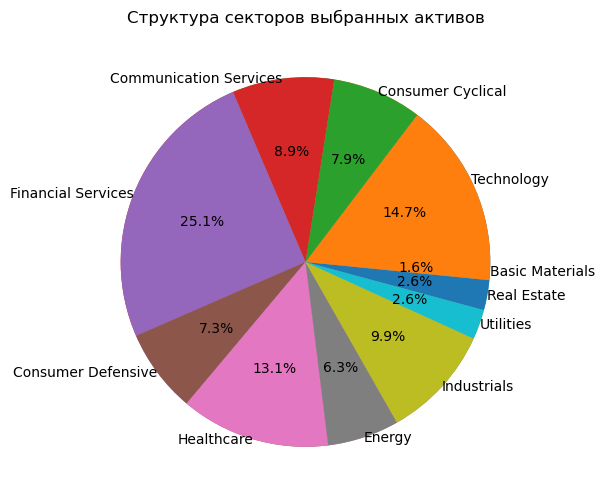

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Структура секторов выбранных активов")

wedges, autotexts = ax.pie(sizes, textprops=dict(color="w"))

plt.setp(autotexts, size=10, weight="bold")

ax.pie(sizes
       , labels=labels
       , autopct='%1.1f%%'
       , pctdistance=0.6
       , labeldistance=1)
plt.show()

In [ ]:
#data.to_excel('original_data.xlsx')

In [29]:
data = data.interpolate(method='linear', limit_direction='forward', axis=0)
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')
data.to_excel('data.xlsx')

C:\Users\kirik\AppData\Local\Temp\ipykernel_18848\2680760802.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
C:\Users\kirik\AppData\Local\Temp\ipykernel_18848\2680760802.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')
